# Introduction to Water Waves

**Lane Ellisor**

*Last Updated: May 17, 2021*

This notebook contains notes and interactive modules that accompany R.Salmon's, *Introduction to Ocean Waves*. 

## Basic Waves

We can imagine waves as being in a 3d box where the x and y axes create a plane and the z axis is the location of the wave's surface. When waves are present the surface is located at $z = \eta(x,y,t)$. In a state of rest, the surface is found at $z=0$. For convience at this point we assume the ocean floor is located at $z= -H$ where $H$ is a constant equal to depth of the ocean. 

### Postulate 1
If $A|k| << 1$, which says that the **wave height must be small compared to the wavelength**, then the equation

$$
\eta = Acos(kx-\omega t)
$$

note that $A$, amplitude, $k$, wave number, and $\omega$, frequency, are constants and the dispersion relation relates the frequency and wave number by

$$ \omega = \sqrt{gh\cdot tanh(kH)}$$

here $g$ is the graviational constant and tanh is the hyperbolic tangent function.


The frequency is always positive and the wave number can be positive or negative. If $k$ is positive then the wave is moving to the right. The wave height is the distance between crest and trough- equal to $2A$. 

The wavelength, $\lambda$, is related to the wavenumber $k$ by
$$ \lambda = \frac{2\pi}{|k|}$$

wave period $T$ is related to the frequency by
$$ T= \frac{2\pi}{\omega}$$

In [1]:
# importing modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import scipy.integrate as integrate
import scipy.special as special
import sympy as sp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy import arange,meshgrid,sqrt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

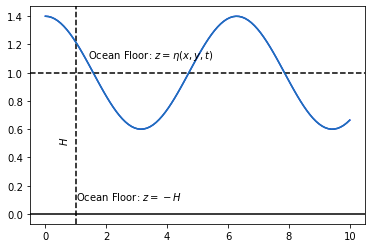

In [2]:
x = np.linspace(0,10, 100)
z = 1.0

plt.plot(x,.4*np.cos(x)+1, 'b' )

plt.axhline(y=0.0, color='black', linestyle='-')
plt.text(1,.1,'Ocean Floor: $z=-H$',rotation=0)
plt.axhline(y=z, color='black', linestyle='--')
plt.text(1.4,1.1,'Ocean Floor: $z=\eta(x,y,t)$',rotation=0)

plt.axvline(z, color='black', linestyle='--')
plt.text(.4,.5,'$H$',rotation=90)

plt.plot(x,.4*np.cos(x)+1 )

### Postulate 2
Keeping the assumption $A|k|<<1$, we can assume a principle of superposition that follows from the above postulate.

The above equations assume that the wave is neither being forced nor dissipated. These describe a free wave. A physical example are long ocean swells. These occur between the point wat which they are generated by storms/wind and the boundary where they dissipate by breaking on a beach. 

In [3]:
%matplotlib inline


def f(a, k, w, t):
    plt.plot(np.linspace(0,10, 1000), a*np.sin(np.linspace(0,10, 1000)*k-w*t))
    plt.axhline(y=0.0, color='r', linestyle='-')
    plt.title('$u(x,t) = Asin(kx-wt)$ ')
    plt.xlabel('x')
    plt.ylabel('u')
interact(f, a=10, k=10, w=10, t=50)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=10, description='…

<function __main__.f(a, k, w, t)>

The fluid can be described as a velocity field, $\vec{v}(x,y,z,t)$,
$$ \vec{v} = \langle u, v, w\rangle $$

This is the general case, but with the equations described above, the y-component of $\vec{v}$ vanishes. The x andz components are thus,

$$ u = A\omega\frac{cosh(k(H+z)}{sinh(kH)} cos(kx-\omega t)$$

$$ w = A\omega\frac{cosh(k(H+z)}{sinh(kH)} sin(kx-\omega t)$$

Let us consider two limiting cases. From now on let $k$ be positive so that the wave is going to the right. 

### Deep Water Waves

In which $kH>>1$ such that the **water depth is much greater than wavelength**. In the limit our equations become

$$ \eta_{DW} = Acos(kx-\omega t)$$

$$ \omega_{DW} = \sqrt{gk}$$

$$u_{DW} = A\omega e^{kz} cos(kx-\omega t)$$

$$w_{DW} = A\omega e^{kz} sin(kx-\omega t)$$

### Shallow Water Waves

In which $kH<<1$ such that the water depth is much less than the wavelength. 

$$\eta_{SW} = Acos(kx-\omega t)$$

$$\omega_{SW} = k\sqrt{gH}$$

$$ u_{SW} = \frac{A\omega}{kH} cos(kx-\omega t)$$

$$ w_{SW} = A\omega(1+z/H)sin(kx-\omega t)$$

### 3d Vector Fields

The value of Hk is 0.2 ,thus this is a deep water wave.


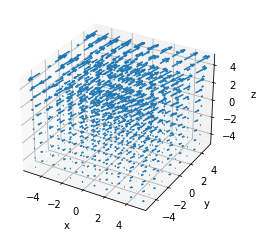

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

A = 1
k = .2
H = 10
g = 9.81 
w = np.sqrt(g*k)
if H*k< 1:
    print('The value of Hk is',A*k, ', thus this is a shallow water wave.')
if H*k> 1:
    print('The value of Hk is',A*k, ',thus this is a deep water wave.')

x, y, z = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10),np.linspace(-5,5,10))

u = A*w*( np.cosh(k*(H+z))/ (np.sinh(k*H)))*np.sin(k*x - w* y)
v = 0
w = A*w*( np.sinh(k*(H+z))/ (np.sinh(k*H)))*np.sin(k*x - w* y)

ax.quiver(x, y, z, u, v, w, length=.3, cmap='Blues_r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')



plt.show()

The value of Hk is 0.1 , thus this is a shallow water wave.


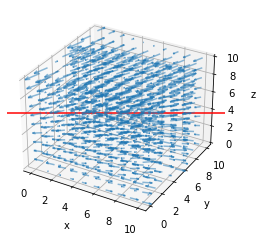

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

A = 1
k = .1
H = 1
g = 9.81 
w = np.sqrt(g*k)
if H*k< 1:
    print('The value of Hk is',A*k, ', thus this is a shallow water wave.')
if H*k> 1:
    print('The value of Hk is',A*k, ', thus this is a deep water wave.')

x, y, z = np.meshgrid(np.linspace(0,10,10),np.linspace(0,10,10),np.linspace(0,10,10))

u = A*w*( np.cosh(k*(H+z))/ (np.sinh(k*H)))*np.sin(k*x - w* y)
v = 0
w = A*w*( np.sinh(k*(H+z))/ (np.sinh(k*H)))*np.sin(k*x - w* y)

ax.quiver(x, y, z, u, v, w, length=.1, cmap='Blues_r', alpha=.5)
plt.axhline(y=0.0, color='r', linestyle='-')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In the deep water case $A|k|>>1$.

### 2d Vector Fields

The value of Hk is 35 , thus this is a deep water wave.


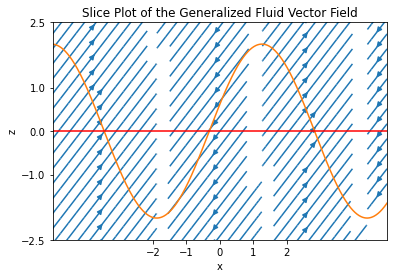

In [6]:
A = 2
k = 1
H = 35
g = 9.81 
w = np.sqrt(g*k)

t=.4



if H*k> 1:
    print('The value of Hk is',H*k, ', thus this is a deep water wave.')
x = np.arange(-5,5,.01)
y = np.arange(-5,5,.01)


X, Y = np.meshgrid(x, y)
u = A*w*( np.cosh(k*(H+X))/ (np.sinh(k*H)))*np.sin(k*X - w* t)
v = A*w*( np.sinh(k*(H+X))/ (np.sinh(k*H)))*np.sin(k*X - w* t)


fig, ax = plt.subplots()


ax.streamplot(X,Y,u,v, density = 1, cmap='Blues_r',)
plt.plot(x, A* np.cos(k*x-w*t), label='$\eta$')
plt.axhline(y=0.0, color='r', linestyle='-')

ax.axis([-5,5,0,2])
ax.xaxis.set_ticks([-2, -1,0,1,2])
ax.yaxis.set_ticks([-2.5,-1, 0,1,2.5])
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_title('Slice Plot of the Generalized Fluid Vector Field')


plt.show()

The value of Hk is 0.5 , thus this is a shallow water wave.


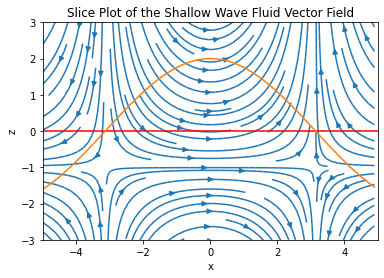

In [7]:
A = 2
k = .5
H = 1
g = 9.81 
w = k*np.sqrt(g*H)
if H*k< 1:
    print('The value of Hk is',H*k, ', thus this is a shallow water wave.')
if H*k> 1:
    print('The value of Hk is',H*k, ', thus this is a deep water wave.')
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)

t= 0

X, Y = np.meshgrid(x, y)
u = ((A*w)/(k*H))*np.cos(k*X - w* t)
v = A*w*(1+Y/H)*np.sin(k*x-w*t)


fig, ax = plt.subplots()


ax.streamplot(X,Y,u,v, density = 1.5, cmap='Blues_r')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.plot(x, A* np.cos(k*x-w*t))
ax.axis([-5,5,-3, 3])

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_title('Slice Plot of the Shallow Wave Fluid Vector Field')


plt.show()

In [8]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

g=9.81

def plotting(t):
    k =.41
    A = 3
    H = 10
    w = np.sqrt(g*k)
    
    X, Y = np.meshgrid(x, y)
    u = A*w*np.exp(k*Y)*np.cos(k*X-w*t)
    v = A*w*np.exp(k*Y)*np.sin(k*X-w*t)
    
    fig, ax = plt.subplots()
    ax.streamplot(X,Y,u,v, density = 1.5, cmap='Blues_r')
    plt.plot(x, A*np.cos(k*x-w*t))
    plt.axhline(y=0.0, color='k', linestyle='-')
    plt.axvline(0, color='k', linestyle='-')
    
    ax.axis([-5,5,-5,5])
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_title('Slice Plot of the Deep Wave Fluid Vector Field')
interact(plotting, t=10)


interactive(children=(IntSlider(value=10, description='t', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.plotting(t)>

In [9]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

g=9.81

def plotting(t):
    k =.41
    A = 3
    H = 10
    w = np.sqrt(g*k)
    
    X, Y = np.meshgrid(x, y)
    
    u = ((A*w)/(k*H))*np.cos(k*X - w* t)
    v = A*w*(1+Y/H)*np.sin(k*x-w*t)
    
    fig, ax = plt.subplots()
    ax.streamplot(X,Y,u,v, density = 1.5, cmap='Blues_r')
    
    plt.plot(x, A*np.cos(k*x-w*t))
    plt.axhline(y=0.0, color='k', linestyle='-')
    plt.axvline(0, color='k', linestyle='-')
    
    ax.axis([-5,5,-5,5])
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_title('Slice Plot of the Shallow Wave Fluid Vector Field')
interact(plotting, t=10)


interactive(children=(IntSlider(value=10, description='t', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.plotting(t)>

The deep water phase speed is given by

$$ c= \frac{\omega}{k} = \sqrt{\frac{g}{k}} = \sqrt{\frac{g\lambda}{2\pi}}$$

The shallow water is 
$$ c = \sqrt{gH}$$

Thus, **waves with longer wavelengths travel faster**. The phase speed is much larger than the fluid velocity, which is small in linear theory.

Because of the exponential, the fluid velocity decays with distance below the surface. The fluid velocity is in the direction of wave propogation under the crest and the opposite of the trough.

In the shallow water case, the horizontal velocity $u$ is independent of $z$. The vertical velocity $w$ varies linearly with $z$, but is smaller than $u$ by a factor of $kH$. The shallow water wave speed depends on $H$ but not $\lambda$. 

We have assumed $H$ is a constant, but obviously it is not. Thus we can use our general description to a case where $H$ changed very gradually. Let $x$ be the perpendicular distance toward the shore. Then the ways ought to obey the *slowly varying* dispersion relation

$$ \omega =\sqrt{g k(x) tanh( k(x)H(x))}$$

As $H(x)$ decreases toward the shore, $k(x)$ must increase, **the wavelength shortens as the wave shoals**. In very shallow water,

$$ \omega =\sqrt{gH(x) k}$$

**The frequency is proportional to the rate at which wave crests pass a fixed point**. Thus, $\omega$ is constant. 

#give omega and depth and get k
g = 9.81
k = 0
l = .5
def waven( w, H):
    if H / l < .2:
        #w = (g * k**2 * H)**(.5)
        return( (w**2)/(g*H))**.5
    if H/ l > .5:
        #w = (g*k)**.5
        return (w**2)/g
    else:
        print('oop')

waven(.02, 6, 500)

In [10]:
g = 9.81 
waven = .0

def wavenumber(w, H):
    if w== 0:
        wlin = w**2 / g 
        dkl = wlin * abs(H)
        if dkl > 3.0:
            waven = wlin / np.tanh(dkl)
        else:
            if dkl < .01:
                waven = np.sqrt(wlin/ (abs(H) * (1-dkl/3)))
            else:
                w = max(wlin, np.sqrt(wlin/ abs(H)))
                for i in range (0, 10):
                    w0 = w
                    dk = w * H
                    fx = wlin - w * np.tanh(dk)
                    fxder = -np.tanh(dk) - dk/np.cosh(dk)**2
                    w = w- fx/ fxder
                    if abs((w0-w))< 10**(-5):
                        waven = w
        return waven